<a href="https://colab.research.google.com/github/binineni/AI4DL/blob/main/week5/chapter04_getting_started_with_neural_networks_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

In [ ]:
print(len(train_data[0]))
print(len(train_data[1]))

218
189


**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 199ms/step - loss: 0.5335 - accuracy: 0.7694 - val_loss: 0.4077 - val_accuracy: 0.8374
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3235 - accuracy: 0.8902 - val_loss: 0.3187 - val_accuracy: 0.8787
Epoch 3/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2405 - accuracy: 0.9191 - val_loss: 0.2853 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1957 - accuracy: 0.9359 - val_loss: 0.2796 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1665 - accuracy: 0.9459 - val_loss: 0.2892 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1404 - accuracy: 0.9565 - val_loss: 0.2853 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1215 - accuracy: 0.9627 - val_loss: 0.2976 - val_accuracy: 0.8819
Epoch 8/20
3

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

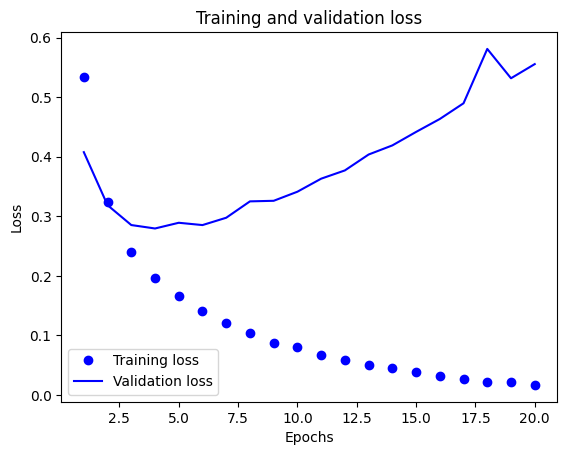

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

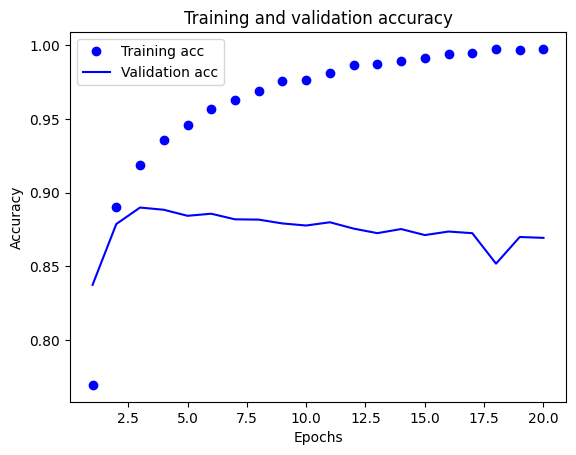

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4670 - accuracy: 0.8141
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2735 - accuracy: 0.9030
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2144 - accuracy: 0.9232
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2863 - accuracy: 0.8871


In [ ]:
results

[0.2862743139266968, 0.8870800137519836]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.16662703],
       [0.9992909 ],
       [0.7801443 ],
       ...,
       [0.08826301],
       [0.06408356],
       [0.6851801 ]], dtype=float32)

### Further experiments

Epoch 1/20
30/30 [==============================] - 2s 66ms/step - loss: 0.6133 - accuracy: 0.7477 - val_loss: 0.5626 - val_accuracy: 0.8042
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.5170 - accuracy: 0.8452 - val_loss: 0.5002 - val_accuracy: 0.8348
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4563 - accuracy: 0.8696 - val_loss: 0.4539 - val_accuracy: 0.8524
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4112 - accuracy: 0.8835 - val_loss: 0.4208 - val_accuracy: 0.8586
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3763 - accuracy: 0.8921 - val_loss: 0.3942 - val_accuracy: 0.8680
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3481 - accuracy: 0.8986 - val_loss: 0.3734 - val_accuracy: 0.8730
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3252 - accuracy: 0.9056 - val_loss: 0.3572 - val_accuracy: 0.8770
Epoch 8/20
30

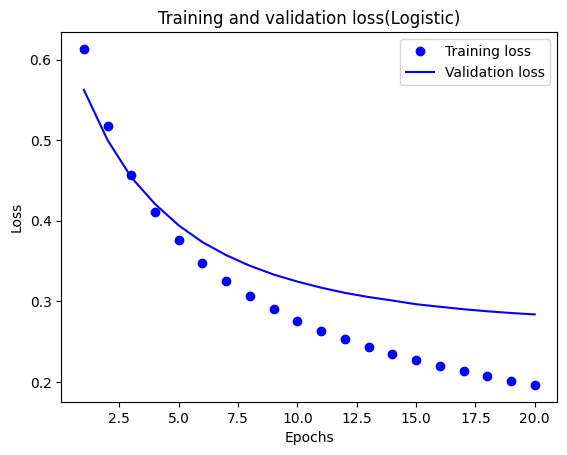

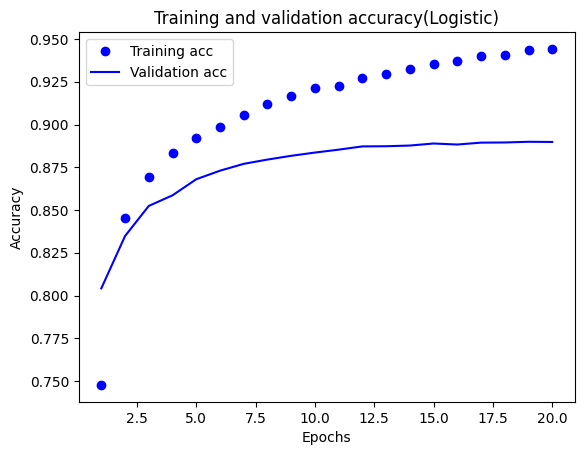

In [ ]:
# Try fitting logistic regression, and check validation loss and accuracy
model = keras.Sequential([
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss(Logistic)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy(Logistic)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 4s 80ms/step - loss: 0.5691 - accuracy: 0.7649 - val_loss: 0.4425 - val_accuracy: 0.8578
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3577 - accuracy: 0.8836 - val_loss: 0.3280 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2601 - accuracy: 0.9125 - val_loss: 0.2961 - val_accuracy: 0.8816
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2071 - accuracy: 0.9308 - val_loss: 0.2789 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1727 - accuracy: 0.9409 - val_loss: 0.2796 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1413 - accuracy: 0.9529 - val_loss: 0.2866 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1219 - accuracy: 0.9600 - val_loss: 0.3006 - val_accuracy: 0.8843
Epoch 8/20
30

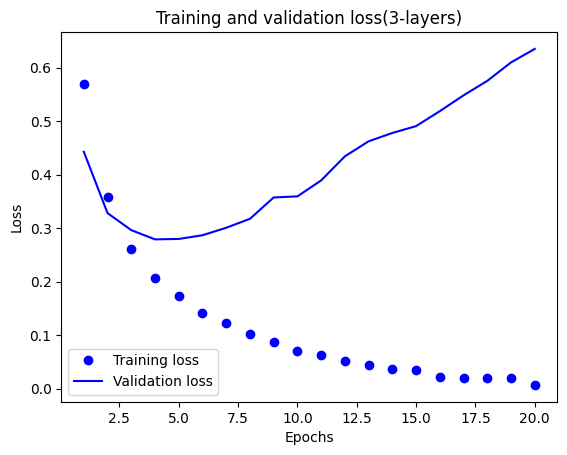

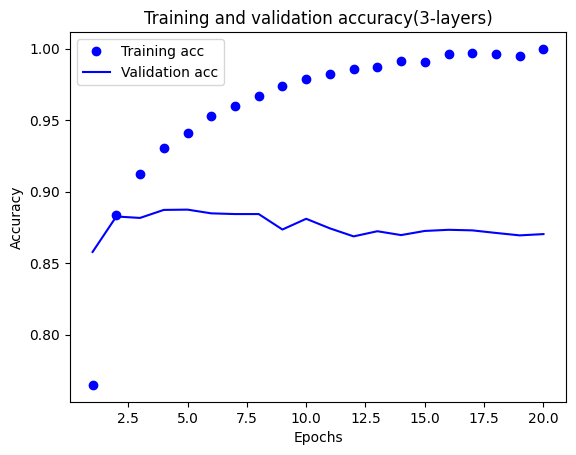

In [ ]:
# Try using one or three hidden layers, and check validation loss and accuracy.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss(3-layers)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy(3-layers)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.5855 - accuracy: 0.7135 - val_loss: 0.4603 - val_accuracy: 0.8181
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3448 - accuracy: 0.8723 - val_loss: 0.3847 - val_accuracy: 0.8464
Epoch 3/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2450 - accuracy: 0.9085 - val_loss: 0.2974 - val_accuracy: 0.8842
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1850 - accuracy: 0.9347 - val_loss: 0.6929 - val_accuracy: 0.7546
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1536 - accuracy: 0.9491 - val_loss: 0.3163 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1305 - accuracy: 0.9525 - val_loss: 0.3589 - val_accuracy: 0.8743
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0984 - accuracy: 0.9676 - val_loss: 0.3959 - val_accuracy: 0.8738
Epoch 8/20
30

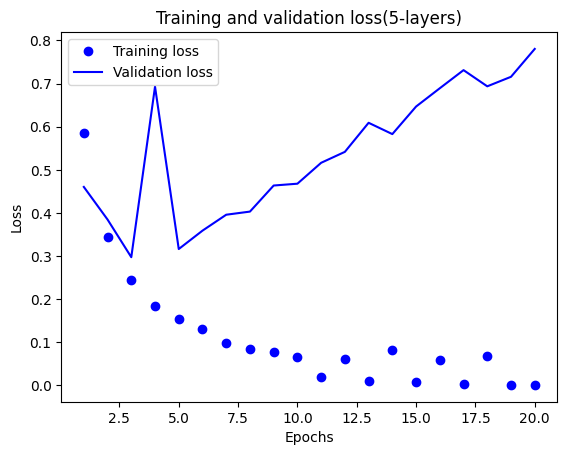

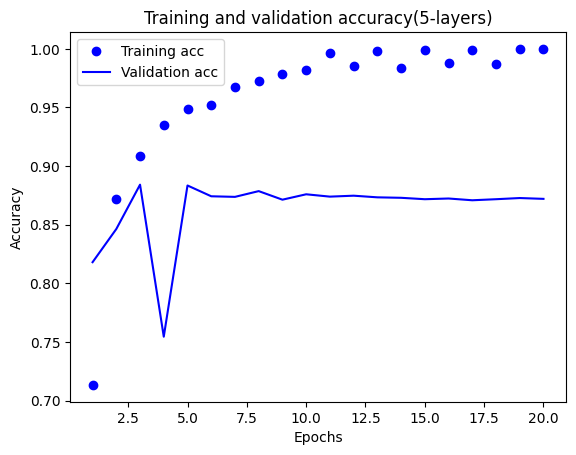

In [ ]:
# Try using layers with more hidden units or fewer hidden units.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss(5-layers)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy(5-layers)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.2146 - accuracy: 0.7359 - val_loss: 0.1899 - val_accuracy: 0.8148
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1708 - accuracy: 0.8449 - val_loss: 0.1630 - val_accuracy: 0.8386
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1457 - accuracy: 0.8685 - val_loss: 0.1462 - val_accuracy: 0.8504
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1285 - accuracy: 0.8831 - val_loss: 0.1325 - val_accuracy: 0.8617
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1156 - accuracy: 0.8930 - val_loss: 0.1240 - val_accuracy: 0.8675
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1057 - accuracy: 0.9035 - val_loss: 0.1178 - val_accuracy: 0.8715
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0981 - accuracy: 0.9108 - val_loss: 0.1111 - val_accuracy: 0.8798
Epoch 8/20
30

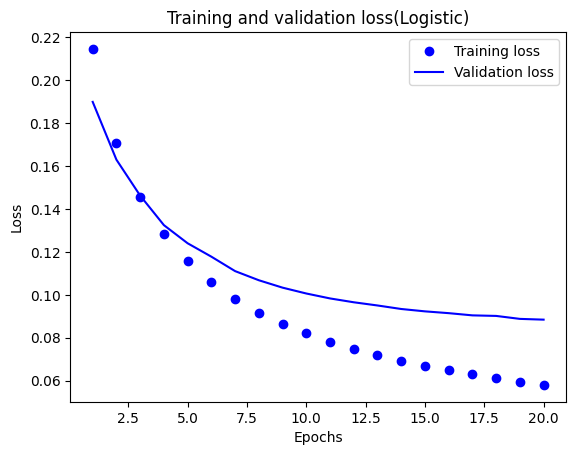

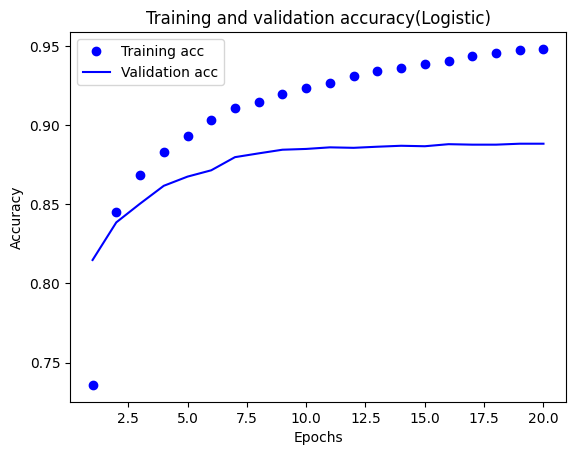

In [ ]:
# Try using the mse loss function instead of binary_crossentropy
model = keras.Sequential([
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss(Logistic)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy(Logistic)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 4s 85ms/step - loss: 0.4976 - accuracy: 0.7942 - val_loss: 0.3671 - val_accuracy: 0.8701
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2909 - accuracy: 0.9034 - val_loss: 0.2946 - val_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2151 - accuracy: 0.9223 - val_loss: 0.3270 - val_accuracy: 0.8628
Epoch 4/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1663 - accuracy: 0.9425 - val_loss: 0.2809 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1311 - accuracy: 0.9546 - val_loss: 0.2952 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1070 - accuracy: 0.9641 - val_loss: 0.3337 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0883 - accuracy: 0.9704 - val_loss: 0.3698 - val_accuracy: 0.8726
Epoch 8/20
30

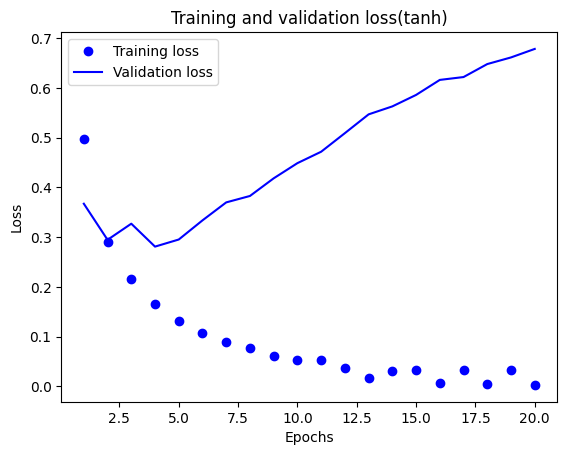

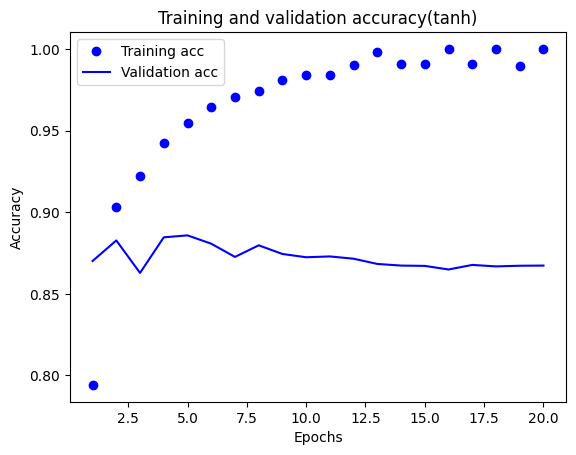

In [ ]:
# Try using the tanh activation instead of relu
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss(tanh)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy(tanh)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", # 원-핫 인코딩을 진행하는 경우 사용
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 2.7366 - accuracy: 0.5069 - val_loss: 1.8636 - val_accuracy: 0.6200
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.5388 - accuracy: 0.6820 - val_loss: 1.3999 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 1s 59ms/step - loss: 1.1836 - accuracy: 0.7438 - val_loss: 1.2178 - val_accuracy: 0.7210
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.9648 - accuracy: 0.7879 - val_loss: 1.1182 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.8033 - accuracy: 0.8275 - val_loss: 1.0361 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 1s 52ms/step - loss: 0.6708 - accuracy: 0.8542 - val_loss: 0.9820 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5564 - accuracy: 0.8816 - val_loss: 0.9397 - val_accuracy: 0.8030
Epoch 8/20
16

**Plotting the training and validation loss**

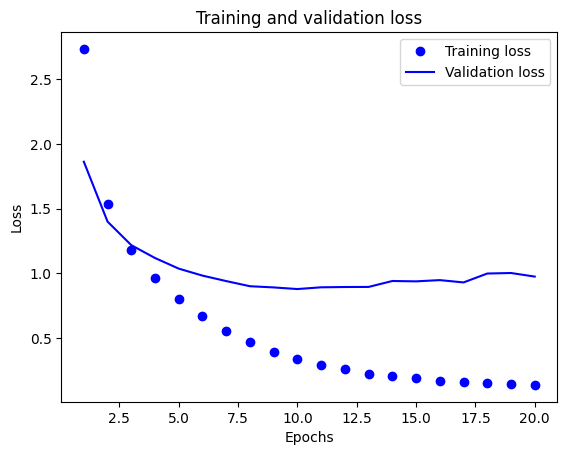

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

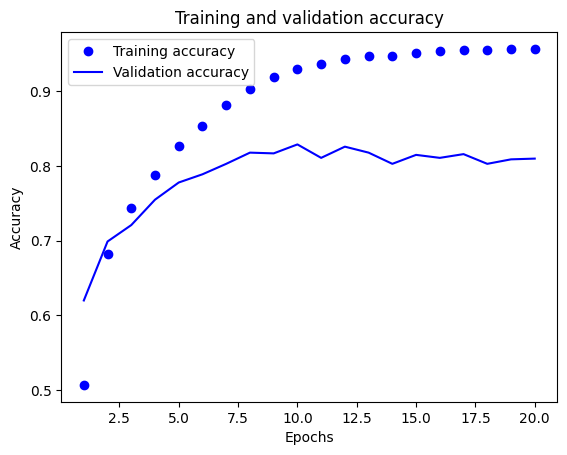

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", # train_label을 원-핫 인코딩했을 경우 사용한다! 시험나올듯 !!
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 52ms/step - loss: 2.7407 - accuracy: 0.4099
Epoch 2/9
18/18 [==============================] - 1s 51ms/step - loss: 1.5467 - accuracy: 0.6792
Epoch 3/9
18/18 [==============================] - 1s 76ms/step - loss: 1.1770 - accuracy: 0.7481
Epoch 4/9
18/18 [==============================] - 1s 74ms/step - loss: 0.9605 - accuracy: 0.7929
Epoch 5/9
18/18 [==============================] - 1s 46ms/step - loss: 0.7950 - accuracy: 0.8253
Epoch 6/9
18/18 [==============================] - 1s 46ms/step - loss: 0.6594 - accuracy: 0.8586
Epoch 7/9
18/18 [==============================] - 1s 45ms/step - loss: 0.5513 - accuracy: 0.8828
Epoch 8/9
18/18 [==============================] - 1s 46ms/step - loss: 0.4601 - accuracy: 0.9000
Epoch 9/9
71/71 [==============================] - 0s 5ms/step - loss: 0.9360 - accuracy: 0.7854


In [ ]:
results

[0.9359838366508484, 0.7853962779045105]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18388245770258238

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

NameError: name 'np' is not defined

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", #반대로 label이 정수형일때는 sparse_categorical 사용
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [20]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [9]:
all_scores

[1.8616507053375244, 2.2965481281280518, 2.4940226078033447, 2.445371389389038]

In [10]:
np.mean(all_scores)

2.2743982076644897

**Saving the validation logs at each fold**

In [21]:
num_epochs = 300
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [22]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

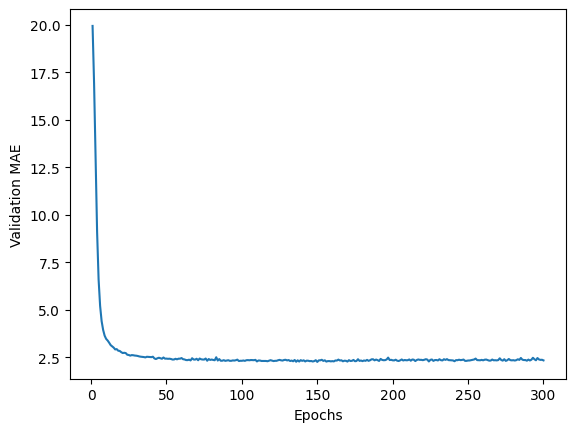

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

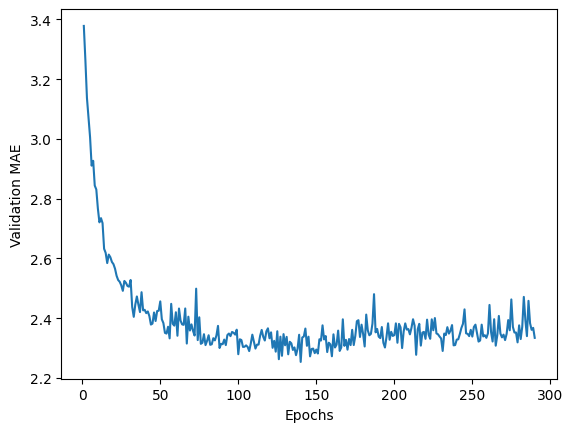

In [24]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

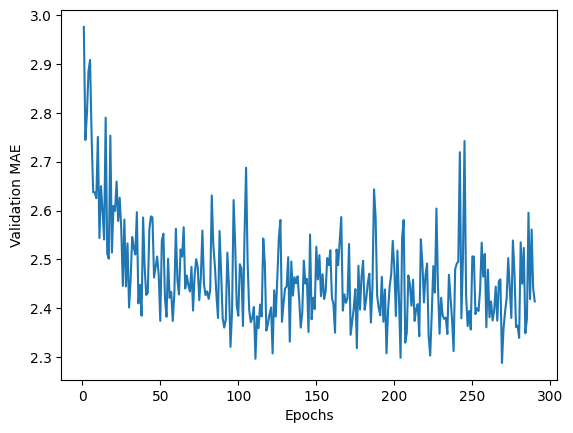

In [19]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

layer를 늘리고 노드를 늘린뒤 줄였더니 overfitting발생
- 기존 : 64 -> 64 -> 1
- 변경 : 64 -> 128 -> 64 -> 1

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary